In [29]:
import pandas as pd
df=pd.read_csv('./data/zomato.csv')
df.head()

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,...,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,...,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,...,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,...,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,...,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,...,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [30]:
cols_to_clean=["Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude"]

for col in cols_to_clean:
    df[col]=df[col].abs()


In [31]:
import numpy as np
# Set the earth's radius (in kilometers)
R = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    lat1=abs(lat1)
    lat2=abs(lat2)
    lon1=abs(lon1)
    lon2=abs(lon2)

    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c
  
# Calculate the distance between each pair of points
df['distance'] = np.nan

for i in range(len(df)):
    df.loc[i, 'distance'] = distcalculate(df.loc[i, 'Restaurant_latitude'], 
                                        df.loc[i, 'Restaurant_longitude'], 
                                        df.loc[i, 'Delivery_location_latitude'], 
                                        df.loc[i, 'Delivery_location_longitude'])


In [32]:
df.head()

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582
1,1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319
2,2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860
3,3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258
4,4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618


<Axes: >

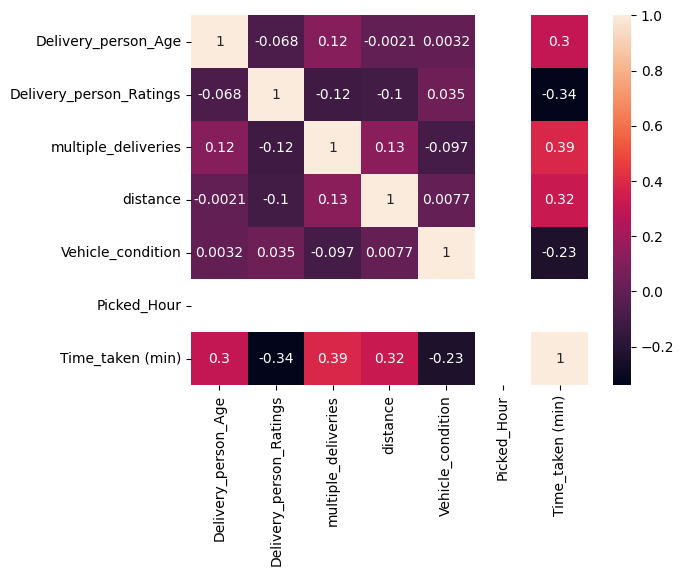

In [33]:
import numpy as np
import seaborn as sns
hm = pd.DataFrame(df, columns=["Delivery_person_Age","Delivery_person_Ratings","multiple_deliveries","distance","Vehicle_condition","Picked_Hour","Time_taken (min)"])
sns.heatmap(hm.corr(),annot=True)


In [45]:
df.head()

,Unnamed: 0,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582
1,1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319
2,2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860
3,3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258
4,4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618


In [46]:
df=df.drop(labels="Type_of_order",axis=1)

In [48]:
X=df.drop(labels=['Time_taken (min)'],axis=1)
Y=df[['Time_taken (min)']]


In [49]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns


In [50]:
categorical_cols

Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_vehicle',
       'Festival', 'City'],
      dtype='object')

In [40]:
numerical_cols


Index(['Unnamed: 0', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Vehicle_condition', 'multiple_deliveries', 'distance'],
      dtype='object')

In [51]:
Weather_conditions_Map=["Sunny","Stormy","Sandstorms","Windy","Fog","Cloudy"]

Road_Traffic_Map=["Low","Medium","High","Jam"]
Type_of_vehicle_map=["bicycle","electric_scooter","scooter","motorcycle"]
Festival_Map=["No","Yes"]
City_Map=["Urban","Metropolitian","Semi-Urban"]


In [21]:
from sklearn.impute import SimpleImputer ##Handling Missing Values
from sklearn.preprocessing import StandardScaler ##Handling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder ##Handling categorical data doing Ordinal Encoding
from sklearn.pipeline import Pipeline ## To create a pipeline so things happen in sequence
from sklearn.compose import ColumnTransformer ## To combine num and cat pipelines


In [52]:
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]
)

##Categorical Pipelinr

cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[Road_Traffic_Map,Type_of_vehicle_map,Festival_Map,City_Map])),
    ('scaler',StandardScaler())
    ]
)

preprocessor=ColumnTransformer( [
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)
])


In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)


In [57]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train) , columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test) , columns=preprocessor.get_feature_names_out())


ValueError: Shape mismatch: if categories is an array, it has to be of shape (n_features,).

In [60]:
X_train.shape,X_test.shape

((31908, 11), (13676, 11))

In [59]:
X_test.shape

(13676, 11)

In [63]:
y_train.shape,y_test.shape

((31908, 1), (13676, 1))